<h1>Data Mining Assignment (Group 5)</h1>
<br />
<h3>Members:</h3>
<ul>
    <li><b>Aditya Virgi Adam Rasyid (202143501517)</b></li>
    <li><b>Al-Fariqy Raihan Azhwar (202143501514)</b></li>
    <li><b>Dafa Rezha Alfarizi (202143501546)</b></li>
    <li><b>Dyana Eka Putri (202143501529)</b></li>
    <li><b>Muhamad Zulfadli (202143501541)</b></li>
</ul>
<br />

<h3>Case : Memprediksi harga cryptocurrency menggunakan LSTM (Long Short Term Memory)</h3>
<br />
<p><b>Objectives :</b></p>
<ul>
  <li>
    Memprediksi harga cryptocurrency dan menentukan apakah akan naik atau turun.
  </li>
</ul>

<br />

<p><b>Attributes :</b></p>
<ul>
  <li><b>Date</b>: Tanggal ketika data dicatat. Biasanya dalam format YYYY-MM-DD (tahun-bulan-hari). Misalnya, "2024-01-01".</li>

  <li><b>Open</b>: Harga pembukaan saham pada awal periode perdagangan (misalnya, awal hari perdagangan). Ini merupakan harga pertama yang diperdagangkan ketika pasar dibuka.</li>

  <li><b>High</b>: Harga tertinggi yang dicapai saham selama periode perdagangan. Ini adalah harga tertinggi yang dicapai oleh saham pada hari tersebut.</li>

  <li><b>Low</b>: Harga terendah yang dicapai saham selama periode perdagangan. Ini adalah harga terendah yang dicapai oleh saham pada hari tersebut.</li>

  <li><b>Close</b>: Harga penutupan saham pada akhir periode perdagangan (misalnya, akhir hari perdagangan). Ini merupakan harga terakhir yang diperdagangkan ketika pasar ditutup.</li>

  <li><b>Adj Close (Adjusted Close)</b>: Harga penutupan yang telah disesuaikan untuk semua tindakan perusahaan seperti dividen, pemecahan saham (stock split), dan lainnya. Ini adalah harga yang paling akurat untuk analisis historis karena mencerminkan nilai yang lebih realistis dari saham tersebut setelah memperhitungkan berbagai penyesuaian.</li>

  <li><b>Volume</b>: Jumlah total saham yang diperdagangkan selama periode tertentu. Ini menunjukkan seberapa banyak saham yang diperdagangkan (dalam unit saham) pada hari tersebut dan bisa digunakan sebagai indikator likuiditas saham.</li>
</ul>

<br />

<h2>Data Collection</h2>

In [1]:
%%shell
set -e

REPO_URL="https://github.com/belajarqywok/cryptocurrency_prediction"
REPO_DIR="cryptocurrency_prediction"
DATASET_DIR="datasets"

if ! command -v git &> /dev/null
then
    apt install -y git
fi

if [ -d "$REPO_DIR" ]; then
    rm -rf "$REPO_DIR"
fi

git clone "$REPO_URL"

if [ -d "$DATASET_DIR" ]; then
    rm -rf "$DATASET_DIR"
fi

if [ -d "$REPO_DIR/$DATASET_DIR" ]; then
    mv "$REPO_DIR/$DATASET_DIR" .
fi

rm -rf "$REPO_DIR"
ls -al "$DATASET_DIR"

Cloning into 'cryptocurrency_prediction'...
remote: Enumerating objects: 632, done.
remote: Counting objects: 100% (347/347), done.
remote: Compressing objects: 100% (192/192), done.
remote: Total 632 (delta 160), reused 155 (delta 155), pack-reused 285
Receiving objects: 100% (632/632), 10.33 MiB | 13.72 MiB/s, done.
Resolving deltas: 100% (315/315), done.
total 20720
drwxr-xr-x 2 root root  12288 Jun  1 07:08 .
drwxr-xr-x 1 root root   4096 Jun  1 07:08 ..
-rw-r--r-- 1 root root  11259 Jun  1 07:08 1000SATS-USD.csv
-rw-r--r-- 1 root root  81927 Jun  1 07:08 1INCH-USD.csv
-rw-r--r-- 1 root root  97627 Jun  1 07:08 AAVE-USD.csv
-rw-r--r-- 1 root root 146342 Jun  1 07:08 ABT-USD.csv
-rw-r--r-- 1 root root 158138 Jun  1 07:08 ADA-USD.csv
-rw-r--r-- 1 root root   7796 Jun  1 07:08 AERO29270-USD.csv
-rw-r--r-- 1 root root   5275 Jun  1 07:08 AEVO-USD.csv
-rw-r--r-- 1 root root 148725 Jun  1 07:08 AGIX-USD.csv
-rw-r--r-- 1 root root  73377 Jun  1 07:08 AIOZ-USD.csv
-rw-r--r-- 1 root root  8

In [2]:
import os
from warnings import filterwarnings

filterwarnings('ignore')

DATASETS_PATH = './datasets'
DATASETS = sorted(
  [
    item for item in os.listdir(DATASETS_PATH)
    if os.path.isfile(os.path.join(DATASETS_PATH, item)) and item.endswith('.csv')
  ]
)

print('Datasets:')
for i in DATASETS[:10]: print(f'  - {i}')
print(f'  - and other (... {len(DATASETS) - 10})')

Datasets:
  - 1000SATS-USD.csv
  - 1INCH-USD.csv
  - AAVE-USD.csv
  - ABT-USD.csv
  - ADA-USD.csv
  - AERO29270-USD.csv
  - AEVO-USD.csv
  - AGIX-USD.csv
  - AIOZ-USD.csv
  - AKT-USD.csv
  - and other (... 240)


In [3]:
import pandas as pd

for i in DATASETS[:10]:
  df = pd.read_csv(f'{DATASETS_PATH}/{i}')
  print(f'Head of {i}:')
  print(df.tail())
  print('\n')

Head of 1000SATS-USD.csv:
           Date      Open      High       Low     Close  Adj Close     Volume
167  2024-05-27  0.000296  0.000322  0.000289  0.000317   0.000317   50512670
168  2024-05-28  0.000317  0.000332  0.000300  0.000313   0.000313   58345517
169  2024-05-29  0.000313  0.000336  0.000304  0.000306   0.000306   45893011
170  2024-05-30  0.000306  0.000360  0.000302  0.000342   0.000342  105649208
171  2024-05-31  0.000350  0.000360  0.000322  0.000325   0.000325   64675212


Head of 1INCH-USD.csv:
            Date      Open      High       Low     Close  Adj Close     Volume
1249  2024-05-27  0.417205  0.428995  0.415036  0.425754   0.425754   25438849
1250  2024-05-28  0.425754  0.471344  0.410179  0.459180   0.459180  121329700
1251  2024-05-29  0.459180  0.509221  0.457314  0.492686   0.492686  218430988
1252  2024-05-30  0.492686  0.528235  0.463533  0.506827   0.506827   97779014
1253  2024-05-31  0.506976  0.531380  0.473836  0.477532   0.477532  120853560


Head 

<br />
<h3>sampling (Ethereum)</h3>

In [4]:
#sample
dataframe = pd.read_csv(f'{DATASETS_PATH}/ETH-USD.csv', index_col='Date')
dataframe.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-22,3789.372803,3810.948486,3655.075195,3737.217773,3737.217773,25155809461
2024-05-23,3737.178467,3943.553955,3552.642578,3776.927246,3776.927246,45623656317
2024-05-24,3776.992432,3825.122559,3631.990234,3726.934570,3726.934570,22257061429
2024-05-25,3726.975586,3776.006592,3710.528320,3749.236572,3749.236572,10000027764
2024-05-26,3749.179932,3879.470703,3732.022949,3825.897461,3825.897461,14650794791
2024-05-27,3826.127197,3973.556396,3821.930420,3892.006836,3892.006836,18949181813
2024-05-28,3892.096924,3924.895752,3771.213867,3840.256348,3840.256348,19846044324
2024-05-29,3840.235107,3880.648438,3742.041260,3763.196533,3763.196533,17411416736
2024-05-30,3763.357666,3823.643311,3702.263672,3746.849609,3746.849609,15065849797


In [5]:
dataframe.info()
dataframe.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
Index: 2396 entries, 2017-11-09 to 2024-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2396 non-null   float64
 1   High       2396 non-null   float64
 2   Low        2396 non-null   float64
 3   Close      2396 non-null   float64
 4   Adj Close  2396 non-null   float64
 5   Volume     2396 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 131.0+ KB


,Open,High,Low,Close,Adj Close,Volume
count,2396.000000,2396.000000,2396.000000,2396.000000,2396.000000,2.396000e+03
mean,1352.665262,1390.927683,1310.927133,1353.921352,1353.921352,1.229681e+10
std,1176.574368,1209.698191,1139.730911,1177.074974,1177.074974,1.007116e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,242.309002,247.320042,235.626839,242.292122,242.292122,5.084750e+09
50%,1206.991821,1230.078553,1168.261536,1209.387512,1209.387512,9.831786e+09
75%,2012.372711,2066.105041,1944.020234,2013.507904,2013.507904,1.681544e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


<br />
<h3>Data Cleaning</h3>

<Axes: >

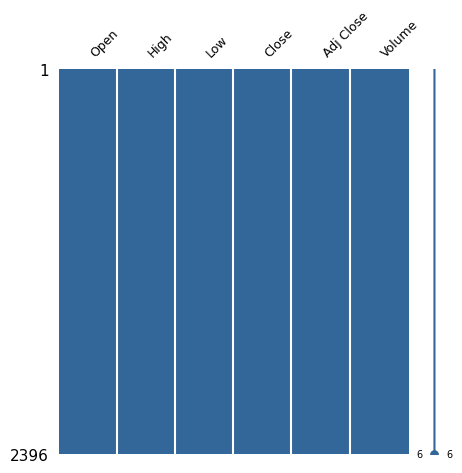

In [6]:
import missingno as msno

msno.matrix(
  dataframe,
  figsize  = (5, 5),
  fontsize = 9,
  color    = (0.2, 0.4, 0.6)
)

In [7]:
dataframe.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
missing_col_names = [
  col for col, _ in dataframe.to_dict().items() \
    if dataframe[col].isnull().sum() > 0
]

print(f"Result: {'There are missing values' if len(missing_col_names) > 0 else 'There are no missing values'}")

Result: There are no missing values


<br />
<h3>Data Standarization and Normalization</h3>

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

dataframe = dataframe[['Close']]

# Standarization
standard_scaler = StandardScaler()
dataframe['Close'] = standard_scaler.fit_transform(dataframe[['Close']])

# Normalization
minmax_scaler = MinMaxScaler(feature_range=(0, 1))
dataframe['Close'] = minmax_scaler.fit_transform(dataframe[['Close']])

dataframe.tail(10)

,Close
Date,
2024-05-22,0.772648
2024-05-23,0.781047
2024-05-24,0.770473
2024-05-25,0.775190
2024-05-26,0.791405
2024-05-27,0.805388
2024-05-28,0.794442
2024-05-29,0.778143
2024-05-30,0.774685


<br />
<h3>Feature Engineering</h3>

In [10]:
import numpy as np

def create_sequences(df, sequence_length):
  labels = []
  sequences = []

  for i in range(len(df) - sequence_length):
    seq   = df.iloc[i:i+sequence_length].values
    label = df.iloc[i+sequence_length].values[0]

    sequences.append(seq)
    labels.append(label)

  return np.array(sequences), np.array(labels)


sequence_length   = 60
sequences, labels = create_sequences(dataframe, sequence_length)
sequences.shape, labels.shape

((2336, 60, 1), (2336,))

<br />
<h3>Modeling and Training</h3>

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


def build_model(input_shape):
  model = Sequential([
    LSTM(units = 50, return_sequences = True, input_shape = input_shape),
    Dropout(0.2),

    LSTM(units = 50, return_sequences = False),
    Dropout(0.2),

    Dense(units=1)
  ])

  model.compile(
    optimizer = 'adam',
    loss = 'mean_squared_error'
  )

  return model


input_shape = (sequences.shape[1], sequences.shape[2])
model = build_model(input_shape)
model.summary()


train_size      = int(len(sequences) * 0.8)
X_train, X_test = sequences[:train_size], sequences[train_size:]
y_train, y_test = labels[:train_size], labels[train_size:]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
early_stopping = EarlyStopping(
  monitor  = 'val_loss',
  patience = 5,
  mode     = 'min'
)

model_checkpoint = ModelCheckpoint(
  filepath       = 'eth.keras',
  save_best_only = True,
  monitor        = 'val_loss',
  mode           = 'min'
)

history = model.fit(
  X_train, y_train,
  epochs          = 200,
  batch_size      = 32,
  validation_data = (X_test, y_test),
  callbacks       = [early_stopping, model_checkpoint]
)

Epoch 1/200
59/59 [==============================] - 21s 130ms/step - loss: 0.0175 - val_loss: 0.0014
Epoch 2/200
59/59 [==============================] - 5s 81ms/step - loss: 0.0029 - val_loss: 0.0036
Epoch 3/200
59/59 [==============================] - 4s 76ms/step - loss: 0.0027 - val_loss: 0.0011
Epoch 4/200
59/59 [==============================] - 4s 61ms/step - loss: 0.0026 - val_loss: 0.0012
Epoch 5/200
59/59 [==============================] - 4s 71ms/step - loss: 0.0021 - val_loss: 0.0010
Epoch 6/200
59/59 [==============================] - 5s 82ms/step - loss: 0.0022 - val_loss: 9.1701e-04
Epoch 7/200
59/59 [==============================] - 4s 60ms/step - loss: 0.0020 - val_loss: 0.0011
Epoch 8/200
59/59 [==============================] - 3s 58ms/step - loss: 0.0019 - val_loss: 9.5400e-04
Epoch 9/200
59/59 [==============================] - 5s 91ms/step - loss: 0.0019 - val_loss: 8.8370e-04
Epoch 10/200
59/59 [==============================] - 4s 61ms/step - loss: 0.0020 - va

In [13]:
model.load_weights('eth.keras')
loss = model.evaluate(X_test, y_test)
predictions = model.predict(X_test)

15/15 [==============================] - 1s 21ms/step


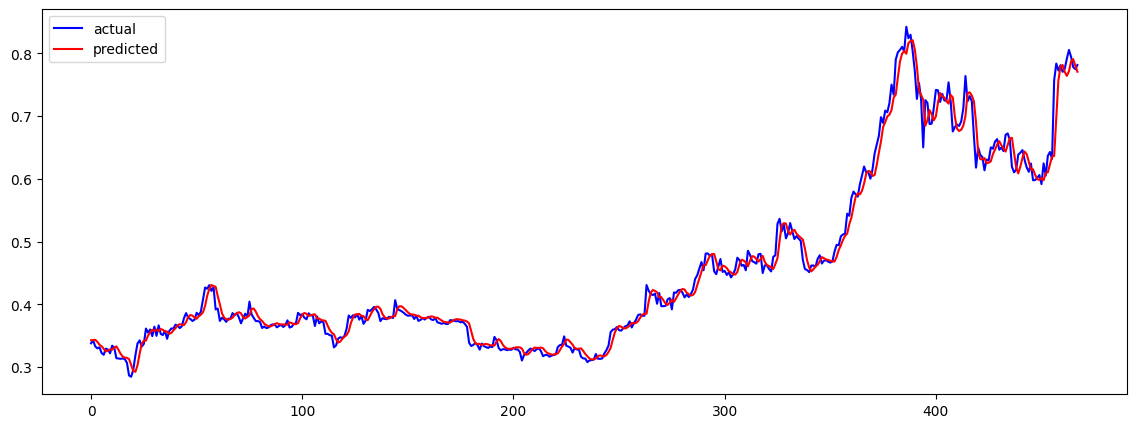

In [14]:
import matplotlib.pyplot as plt

plt.figure(
  figsize = (14, 5)
)

plt.plot(y_test, color = 'blue', label = 'actual')
plt.plot(predictions, color = 'red', label = 'predicted')
plt.legend()
plt.show()

<br />
<h3>Testing</h3>

In [15]:
days = 7

lst_seq = dataframe[-sequence_length:].values
lst_seq = np.expand_dims(lst_seq, axis = 0)

predicted_prices = {}
last_date = pd.to_datetime(dataframe.index[-1])

for _ in range(days):
  predicted_price = model.predict(lst_seq)
  last_date       = last_date + pd.Timedelta(days = 1)

  predicted_prices[last_date] = minmax_scaler.inverse_transform(predicted_price)
  predicted_prices[last_date] = standard_scaler.inverse_transform(predicted_prices[last_date])

  lst_seq = np.append(lst_seq[:, 1:, :], [predicted_price], axis = 1)


eth_prices = minmax_scaler.inverse_transform(dataframe[['Close']])
eth_prices = standard_scaler.inverse_transform(eth_prices)

1/1 [==============================] - 0s 28ms/step


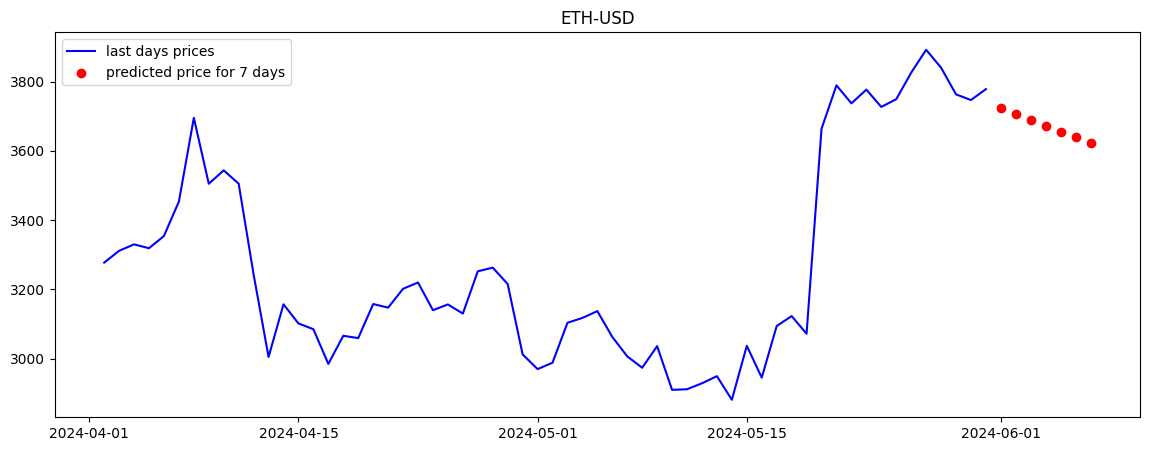

In [16]:
plt.figure(
  figsize = (14, 5)
)

plt.plot(
  pd.to_datetime(dataframe.index[-sequence_length:]),
  eth_prices[-sequence_length:],
  color = 'blue',
  label = 'last days prices'
)

plt.scatter(
  predicted_prices.keys(),
  predicted_prices.values(),
  color = 'red',
  label = f'predicted price for {days} days'
)

plt.title('ETH-USD')
plt.legend()
plt.show()

In [17]:
import json

dataframe_date = dataframe.index.tolist()
dataframe_close = [idx[0] for idx in eth_prices.tolist()]
dataframe_json = {
  'Date': dataframe_date,
  'Close': dataframe_close
}

with open('ETH-USD-posttrained.json', 'w') as f:
  json.dump(dataframe_json, f)

In [18]:
for timestamp in list(predicted_prices.keys()):
  formatted_date = timestamp.strftime('%Y-%m-%d')
  dataframe_json['Date'].append(formatted_date)

for value in list(predicted_prices.values()):
  prediction_value = float(value)
  dataframe_json['Close'].append(prediction_value)

df_loaded = pd.DataFrame(dataframe_json)
df_loaded.set_index('Date', inplace=True)
df_loaded.tail(10)

,Close
Date,
2024-05-29,3763.196533
2024-05-30,3746.849609
2024-05-31,3778.403320
2024-06-01,3724.088135
2024-06-02,3707.247070
2024-06-03,3688.963623
2024-06-04,3671.277588
2024-06-05,3654.622803
2024-06-06,3638.932861
